<a href="https://colab.research.google.com/github/PUC-Infovis/syllabus-2019/blob/master/testdir1/testdir2/parte3_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ayudantía 00 || Parte 3: *Machine Learning*** 
### Por Vicente Valencia

---
#### Nota

Cualquier librería que les falte, instálenla. Las que se usan en este notebook son:
- scikit learn
- pandas
- numpy
- graphviz. Esta librería deben [instalarla](https://graphviz.gitlab.io/download/) y ponerla en su [path](https://en.wikipedia.org/wiki/PATH_(variable))
- seaborn
---

## ¿Qué es *Machine Learning*?

*Machine Learning* o aprendizaje de máquina es el estudio científico de algoritmos y modelos estadísticos que los sistemas computacionales usan para realizar una tarea específica eficazmente sin usar instrucciones explícitas, apoyándose, en cambio, en patrones e inferencia. Es visto como un subconjunto de la inteligencia artificial. [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning)

Para entender mejor lo que es machine learning y lo que abarca, es recomendable leer [este artículo](https://towardsdatascience.com/machine-learning-for-beginners-d247a9420dab).

## ¿Por qué estudiar aprendizaje de máquina en un curso de visualización?

El aprendizaje de máquina es tan poderoso y ubicuo que es muy probable que se topen, o hayan topado, con visualizaciones de estudios y aplicaciones interesantes de él. Visualizar conceptos o resultados de aprendizaje de máquina es una habilidad que es muy deseable, pues, incluso si no se está interesado en el aprendizaje de máquina, no toda persona que hace machine learning sabrá visualizar de buena manera lo que haga y, teniendo un conocimiento superficial del aprendizaje de máquina, se puede entender mucho de lo que esa persona tenga que visualizar, pudiendo trabajar con ella para exponer de buena manera las ideas que tenga.

En resumen, uno puede saber mucho de visualización, pero si no se entiende lo que hay que visualizar (que es hoy en gran medida información de *machine learning*), uno limita los campos en los que puede aplicar su conocimiento.

No es necesidad para este curso entender modelos de aprendizaje en particular, pero sí conceptos generales, que deberían poder adquirir en esta ayudantía.

Si ya estás familiarizado con el aprendizaje de máquina, esta guía podría ser muy básica para ti, por lo que podrías leerla rápidamente, pero si encuentras algo nuevo, es recomendable que la hagas.

Ahora, a empezar...

## Conceptos importantes

- **Tipos de aprendizaje**: supervisado, no supervisado y reforzado
- **Necesidad, meta o problema**: ¿qué se quiere lograr? Clasificar, predecir, agrupar, etc.
- **Datos**: ¿qué información se necesita para alcanzar la meta? Esto dependerá del dominio en cuestión. Pueden ser datos de cualquier cosa, siempre que tengan relación con el objetivo del problema.
- **Modelo**: ¿cómo se deberían usar los datos para alcanzar la meta? Cada modelo tiene su manera de lograr realizar la tarea que se quiera realizar.
- **Entrenamiento**: como en el aprendizaje de máquina no hay instrucciones directas para realizar una tarea, los modelos necesitan guiarse por los datos para "extraer conocimiento" desde ellos, en vez de del programador.
- **Evaluación de desempeño**: los modelos no son perfectos, pero sí hay algunos mejores que otros (dependiendo de la situación), por lo que es deseable saber cuán buenos son. En el aprendizaje supervisado, que es el que se verá en esta ayudantía (en su mayor parte), la evaluación de desempeño se hace, generalmente, dividiendo los datos en conjuntos de entrenamiento y evaluación, como veremos en lo que sigue.
- ***Overfitting*** o sobre-entrenamiento: existen circunstancias en las que un modelo funciona mucho mejor cuando se prueba con los datos con los que fue entrenado que cuando se prueba con los datos de prueba (que no ha "visto" jamás), esto se llama sobre-entrenamiento. A menudo se dice que cuando un modelo se ha sobre-entrenenado, se ha aprendido lo datos "de memoria". No se profundiza en este concepto en esta ayudantía, pero es importante en machine learning.

## Modelo: Regresión Lineal

### Descripción
La **regresión** lineal es un método de aprendizaje de máquina supervisado que permite modelar una relación lineal (en versiones más complicadas de regresión no solo se buscan relaciones lineales) entre datos. Por ejemplo, se podría querer encontrar una relación entre la superficie de un departamento con su precio. La regresión lineal tomaría datos de varios departamentos con la información de su superficie y de su precio y computaría una recta en su fase de entrenamiento. Esta recta sería una función de la superficie y su dominio sería los precios de los departamentos. De esta manera, se pueden predecir precios para departamentos con superficies que no estaban en los datos.

La regresión lineal en su versión más simple puede resolverse analíticamente con el método de mínimos cuadrados ordinarios. Esto quizás lo hayan visto en algún curso. También se puede resolver con inferencia estadística, pero lo más importante es que siempre **se busca una recta** (o hiperplano) **que esté lo más cercana posible a todos los puntos** como en la siguiente figura (https://towardsdatascience.com/linear-regression-the-easier-way-6f941aa471ea). 

![]('images/linear_regression.gif)

Si desean adentrarse más en cómo funciona la regresión lineal, lean [este artículo](https://medium.com/@jorgeabud/linear-regression-method-explained-with-animations-ff7d7da60749), que explica el método con animaciones.

### Ejemplo
El archivo *machines.csv* es un [dataset](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware) con información sobre CPUs (procesadores). Los detalles de la estructura de los datos los pueden ver en el link apenas anterior y en el archivo *machine-names.txt*.

Imaginen que se quiere determinar el desempeño relativo de un procesador. Este desempeño se mide, en este caso, en porcentajes mayores a cero. Por ejemplo, un procesador con desempeño relativo de 117% significa que tal procesador es 1.17 veces mejor que el procesador de referencia (el procesador de referencia lo pueden buscar en la página del *dataset* o pueden ignorar cuál es, pues solo importa, en esta ayudantía, saber que existe)

In [3]:
!wget --recursive https://github.com/VinceValence/PUC-InfoVis-2019-A00/tree/master/datasets

--2019-08-07 03:49:22--  https://github.com/VinceValence/PUC-InfoVis-2019-A00/tree/master/datasets
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘github.com/VinceValence/PUC-InfoVis-2019-A00/tree/master/datasets’

github.com/VinceVal     [ <=>                ]  57.05K  --.-KB/s    in 0.03s   

2019-08-07 03:49:22 (2.17 MB/s) - ‘github.com/VinceValence/PUC-InfoVis-2019-A00/tree/master/datasets’ saved [58419]

Loading robots.txt; please ignore errors.
--2019-08-07 03:49:22--  https://github.com/robots.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 31710 (31K) [text/plain]
Saving to: ‘github.com/robots.txt’

github.com/robots.t 100%[===================>]  30.97K  --.-KB/s    in 0s      

2019-08-07 03:49:22 (91.4 MB/s) - ‘github.com/robots.txt’ saved [31710/31710]

FINI

ls: cannot access 'github.com/VinceValence/PUC-InfoVis-2019-A00/tree/master/datasets/': Not a directory


In [0]:
import pandas as pd

En este caso, el archivo de los datos no tiene los nombres de las columnas, por lo que hay que tomar ello en cuenta al leer el archivo con el parámetro `names`. Nótese que el desempeño a predecir es el llamado `published-performance`. Esta columna contiene, entonces, las etiquetas o *labels* de nuestro problema (lo que lo hace ser de aprendizaje supervisado), equivalentemente a los precios de los departamentos del ejemplo anterior. Las demás columnas, excepto una, tomarán el mismo rol de las superficies de los departamentos (sí, la regresión lineal se puede hacer con más variables. Lo que resulta no es una recta, sino un hiperplano), siendo características de cada procesador que se usarán para predecir la etiqueta o desempeño.

La columna que no usaremos será la columna `estimated-performance`, pues esta indica el desempeño que estimaron científicos en un estudio y sería poco realista usarla, pues tendríamos algo cercano a la respuesta.

In [0]:
names = ['vendor',
         'model',
         'cycle-time',
         'mem-min',
         'mem-max',
         'cache',
         'channel-min',
         'channel-max',
         'published-performace',
         'estimated-performance']
processors = pd.read_csv('datasets/machine.csv', names=names)
processors.head()  # head entrega el principio del archivo

,vendor,model,cycle-time,mem-min,mem-max,cache,channel-min,channel-max,published-performace,estimated-performance
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


Como había dicho, no es necesario que entiendan a fondo cómo funciona cada modelo. Existe una librería llamada [scikit-learn](https://scikit-learn.org/stable/) que posee implementaciones de muchos modelos de machine learning, incluyendo [una de regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Se puede usar como sigue

In [0]:
from sklearn.linear_model import LinearRegression

# crear una instancia de la clase LinearRegression
reg = LinearRegression()

Para poder entregarle los datos al modelo para entrenarlo, debemos separarlos (porque así lo requiere la función que se los entrega)

In [0]:
X = processors.iloc[:,:-2]  # todas las columnas menos las dos últimas. Todas las filas
X.head()

,vendor,model,cycle-time,mem-min,mem-max,cache,channel-min,channel-max
0,adviser,32/60,125,256,6000,256,16,128
1,amdahl,470v/7,29,8000,32000,32,8,32
2,amdahl,470v/7a,29,8000,32000,32,8,32
3,amdahl,470v/7b,29,8000,32000,32,8,32
4,amdahl,470v/7c,29,8000,16000,32,8,16


In [0]:
y = processors['published-performace']  # solo la columna estimated-performance
y.head()

0    198
1    269
2    220
3    172
4    132
Name: published-performace, dtype: int64

Además, hay que separar los datos en conjuntos de entrenamiento y de prueba, para luego poder evaluar el desempeño del modelo en los datos de prueba. Para dividir los datos, se puede usar la función `train_test_split`, también de la librería scikit-learn

In [0]:
from sklearn.model_selection import train_test_split

# dejamos un cuarto del dataset para evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Ahora sí se puede entrenar el modelo. Esto se hace con el método `fit`

In [0]:
reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'c.r.d'

¡Oh!, al parecer no se puede entrenar. Hay un problema con los datos. La regresión solo puede usar datos numéricos, pero hay columnas en nuestro *dataset* que no lo son.

Para solucionar esto, se pueden hacer muchas cosas. Una de ellas sería simplemente no usar esas columnas para hacer la regresión y otra sería convertir cada nombre en un número. Por su simplicidad, haremos la primera.

In [0]:
X = processors.iloc[:,2:-2] # nos deshacemos de las primeras dos columnas

Repitiendo...

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Hemos entrenado el modelo de regresión. ¿Cómo funcionará? Tomemos un procesador del conjunto de prueba y predigamos su desempeño.

In [0]:
one_x_test = X_test.sample(1, random_state=42)
one_x_test

,cycle-time,mem-min,mem-max,cache,channel-min,channel-max
93,57,4000,16000,1,6,12


In [0]:
one_y_test = y_test.loc[one_x_test.index]
one_y_test

93    132
Name: published-performace, dtype: int64

In [0]:
reg.predict(one_x_test)

array([112.93774329])

Hmmmm, ok, se equivocó (¿por mucho? ¿por poco?), pero no podemos concluir mucho con este resultado, pues es solo una prueba. Por suerte, podemos pasarle al método `predict` todos los datos de prueba de una vez y hacer que nos resuma cuán bien predijo usando [el coeficiente de determinación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) de la predicción.

In [0]:
prediction = reg.predict(X_test)  # las predicciones de los datos de prueba

In [0]:
reg.score(X_test, y_test)

0.7456539183392147

Este valor es bueno, pues el coeficiente de determinación puede ser a lo más uno, el que es el mejor valor posible (*i.e.* indica que las predicciones fueron todas correctas).

### Visualización

Algunas formas de visualizar la regresión son [estas](https://stats.stackexchange.com/questions/89747/how-to-describe-or-visualize-a-multiple-linear-regression-model), pero son algo complicadas, pues hay más de una variable predictora. Puede hacer usted mismo una regresión simple con solo una variable predictora y usar el código de matplotlib dado para graficar la recta, que debería verse como [esta](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

![](images/linear_regression_goal.png)

In [0]:
# Aquí escriba su código para entrenar con una sola variable predictora

In [0]:
# reemplaze sus datos (X_test, y_test y prediction). La celda arrojará un error si no lo hace
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, prediction, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: x and y must be the same size

## Modelo: Árbol de decisión

Este modelo de **clasificación** también es de aprendizaje supervisado y es uno de los más intuitivos, pues transparentan sus decisiones de clasificación y pueden visualizarse fácilmente. Inviertan 20 minutos en [este artículo](https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb).

En la regresión lineal tratamos de predecir un porcentaje, que es un valor continuo del 0 al infinito (porque es porcentaje relativo), pero ¿si quisiéramos clasificar algo con alguna clase de un grupo finito de clases, por ejemplo, clasificar un animal dentro de las categorías o clases *gato*, *perro*, *tardígrado*? Un algoritmo de clasificación, como un árbol de decisión, viene bien en este caso.

Para este ejemplo, usaremos [este *dataset*](https://archive.ics.uci.edu/ml/datasets/Flags) de banderas. Nuevamente se puede aprender más sobre él en el vínculo (pues algunos atributos están codificados con números, por ejemplo, el idioma o la religión). Vamos a predecir la religión del país de la bandera, pero se podría tratar de predecir algo como el continente, también.

Los nombres de las columnas de este *dataset* son muchos más que en el anterior, por esto, los escribí en un archivo aparte llamado flag-columns.csv

In [0]:
names = pd.read_csv('datasets/flags/flag-columns.csv', header=None, squeeze=True)

Leamos los datos de banderas

In [0]:
flags = pd.read_csv('datasets/flags/flag.csv', names=names)
flags.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Ahora debemos hacer algo un poco turbio. Resulta que la implementación de los árboles de decisión de scikit-learn no funciona con *strings*, por lo que debemos convertirlos en números. Como si esto fuera poco, esta implementación no funciona (no arroja errores, pero no funciona bien en el entrenamiento o formación del árbol) con datos categóricos no binarios y no ordinales, aunque estos estén codificados en números. Para hacerla funcionar con este tipo de datos, se deben codificar, los datos, en una codificación que se llama [*one-hot encoding*](https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179). Si quieren saber más sobre por qué hay que hacer esto, vean [esta respuesta](https://stackoverflow.com/a/56857255) en stackoverflow.

Después de codificar los atributos categóricos no binarios y no ordinales a *one-hot*, cada uno de ellos se dividirá en tantos atributos como valores posibles haya tenido el atributo original. Por ejemplo, si el atributo idioma tuviera tres valores posibles: inglés, español e italiano, el atributo se dividiría en los siguientes tres atributos: idioma_inglés, idioma_español e idioma_italiano. De esta manera, cada atributo tendría naturaleza binaria (1 si el atributo está presente y 0 si no).

In [0]:
X = flags.loc[:,flags.columns != 'religion']

# one hot encoding. scikit learn no soporta 
# atributos categóricos en árboles de decisión
# https://stackoverflow.com/a/56857255
cat_cols = pd.read_csv('datasets/flags/flag-cat-cols.csv', squeeze=True, header=None)
cat_cols_no_religion = cat_cols.loc[cat_cols != 'religion']
one_hot = pd.get_dummies(X, drop_first=True, columns=cat_cols_no_religion)

y = flags['religion']
X_train, X_test, y_train, y_test = train_test_split(one_hot, y, test_size=0.4, random_state=100)

Ahora entrenemos con los datos codificados. La visualización del árbol se guardará en un PDF.

In [0]:
from sklearn import tree
import graphviz

# entrenamos el árbol y lo graficamos en un pdf con graphviz
t = tree.DecisionTreeClassifier()
t.fit(X_train, y_train)
dot_data = tree.export_graphviz(
    t,
    out_file=None,
    feature_names=one_hot.columns,
    class_names=['Catholic',
                 'Other Christian',
                 'Muslim',
                 'Buddhist',
                 'Hindu',
                 'Ethnic (?)',
                 'Marxist (?)',
                 'Other'],
    filled=True,
    rounded=True,
    special_characters=True
)
graphviz.Source(dot_data).render('decision-tree')

'decision-tree.pdf'

De la visualización se pueden desprender muchas cosas. Una es que, aparentemente, algo más determinante en la religión de un país no tiene mucho que ver con su bandera, sino con cosas como su idioma o ubicación. Noten, por ejemplo, que el primer nodo verifica si el idioma hablado por el país de la bandera es árabe (el idioma 8, véanse los detalles del *dataset*). Si es, entonces el árbol clasifica la bandera (o el país) con la religión del Islam.

También pueden notar que no todos los *datasets* son muy correctos. Este, por ejemplo, tiene religiones marxistas y étnicas. Habría que justificar muy bien el por qué de la existencia de estas etiquetas.

Para evaluar el árbol, usen el set de prueba y el método predict y score como lo usamos en regresión.

In [0]:
predictions = t.predict(X_test)
predictions

array([6, 1, 0, 0, 2, 2, 0, 3, 0, 2, 1, 3, 2, 7, 0, 0, 2, 5, 5, 5, 5, 5,
       5, 1, 1, 2, 6, 5, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 6, 0, 5, 1, 6,
       5, 2, 0, 0, 5, 0, 2, 0, 5, 0, 5, 1, 5, 5, 1, 2, 5, 1, 0, 3, 7, 5,
       5, 0, 2, 0, 1, 0, 0, 5, 1, 0, 2, 2], dtype=int64)

In [0]:
t.score(X_test, y_test)

0.5256410256410257

In [0]:
from sklearn import metrics

conf_mat = metrics.confusion_matrix(y_test, predictions)
conf_mat

array([[12,  0,  0,  0,  0,  2,  1,  0],
       [ 6, 12,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  7,  0,  0,  3,  1,  0],
       [ 0,  0,  5,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  9,  0,  0],
       [ 4,  2,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  1,  1,  0,  1,  0,  0]], dtype=int64)

In [0]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65        15
           1       0.75      0.57      0.65        21
           2       0.54      0.64      0.58        11
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3
           5       0.50      0.90      0.64        10
           6       0.25      0.11      0.15         9
           7       0.00      0.00      0.00         3

    accuracy                           0.53        78
   macro avg       0.32      0.38      0.33        78
weighted avg       0.48      0.53      0.48        78



In [0]:
import seaborn as sns

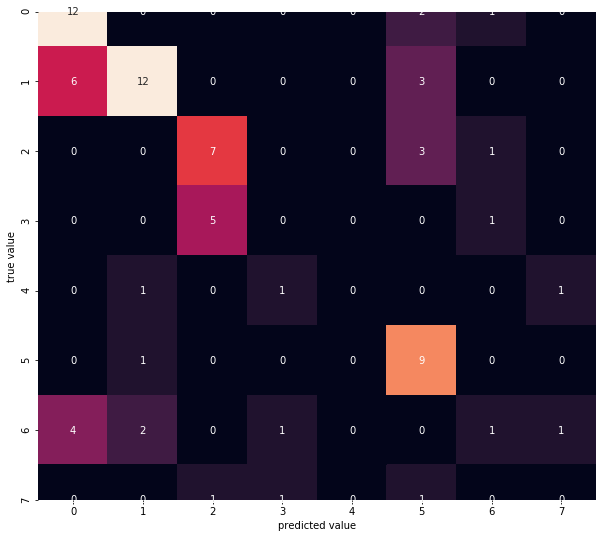

In [0]:
sns.heatmap(conf_mat, annot=True, cbar=False, square=True)
plt.xlabel('predicted value')
plt.ylabel('true value');